In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Indian_Startup_Investment_Trends.csv"  # Update if needed
df = pd.read_csv(file_path)
print(df)


      Startup_ID           Name      Sector Sub-Sector       City  \
0       a713cd4f      Startup_0      Retail      Sub_2       Pune   
1       b75f6987      Startup_1      EdTech      Sub_2       Pune   
2       d5ba7ec2      Startup_2    AgriTech      Sub_7    Chennai   
3       5190a643      Startup_3  HealthTech      Sub_8     Mumbai   
4       a6801a40      Startup_4  HealthTech      Sub_6  Bangalore   
...          ...            ...         ...        ...        ...   
12423   0f13d364  Startup_12423  HealthTech     Sub_10       Pune   
12424   377d998c  Startup_12424      EdTech      Sub_2     Mumbai   
12425   be50b852  Startup_12425      EdTech      Sub_9       Pune   
12426   574ecf87  Startup_12426  HealthTech      Sub_1       Pune   
12427   1d0384ad  Startup_12427      Retail      Sub_9      Delhi   

             State  Founded_Year Founder_Name Funding_Stage   Investment_Type  \
0      Maharashtra          2022  Founder_356      Series D             Grant   
1        

In [12]:
drop_cols = [
    "Startup_ID", "Name", "Founder_Name", "Lead_Investor", "Co-Investors",
    "Pitch_Deck_Link", "Funding_Date", "Competitors", "Acquisition_Details"
]
df_cleaned = df.drop(columns=drop_cols)

In [2]:
# Convert categorical columns to numerical
categorical_cols = df_cleaned.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for future use

<Figure size 1500x500 with 0 Axes>

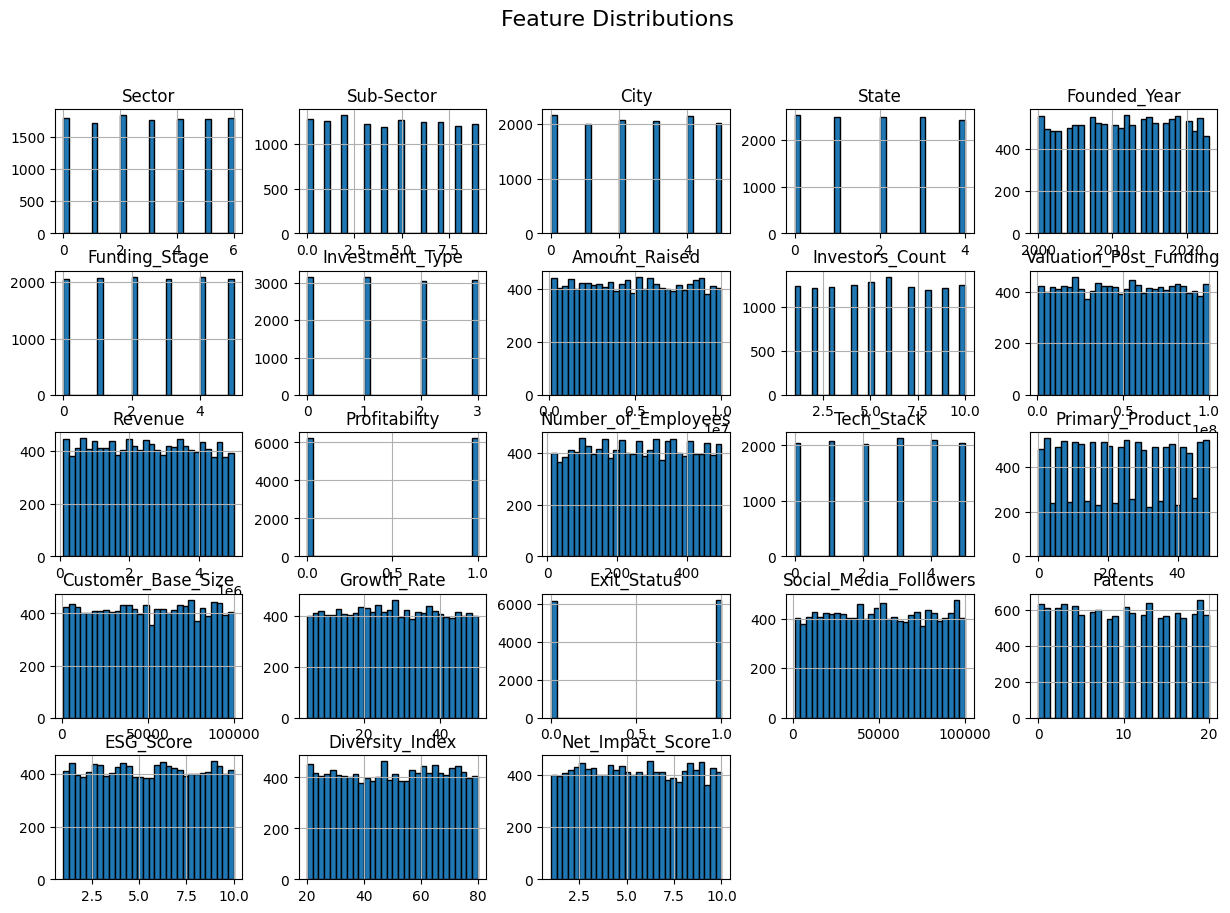

In [3]:
plt.figure(figsize=(15, 5))
df_cleaned.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

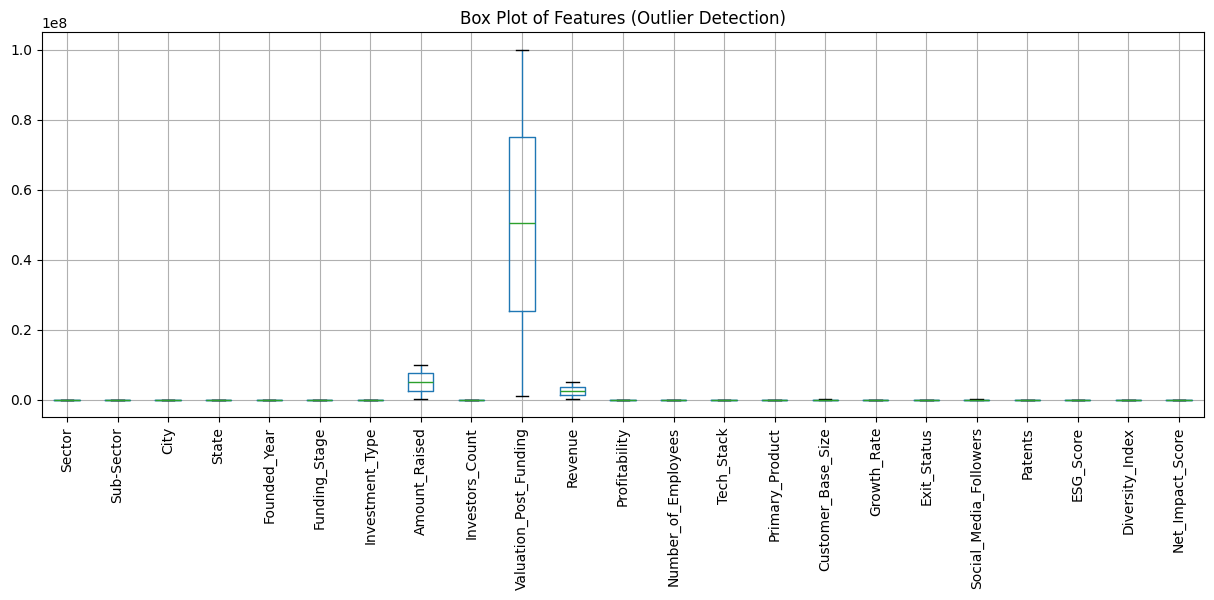

In [4]:

# Plot Box Plots (Check for Outliers)
plt.figure(figsize=(15, 5))
df_cleaned.boxplot(rot=90)
plt.title("Box Plot of Features (Outlier Detection)")
plt.show()

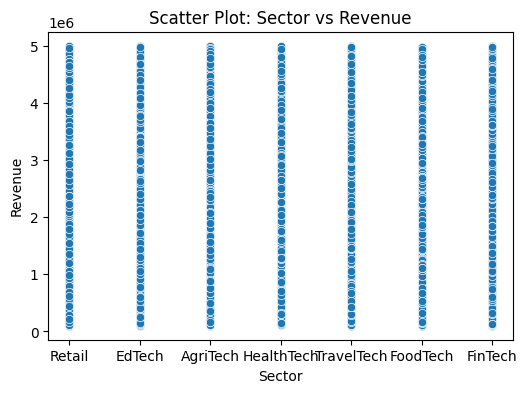

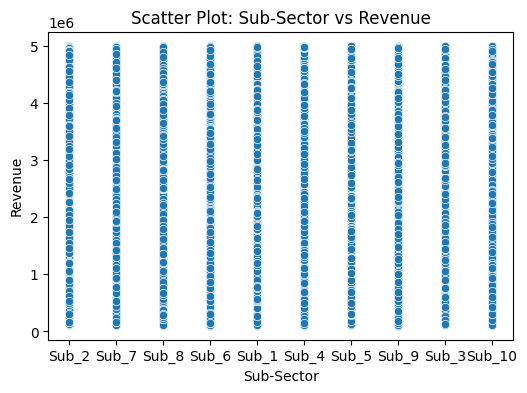

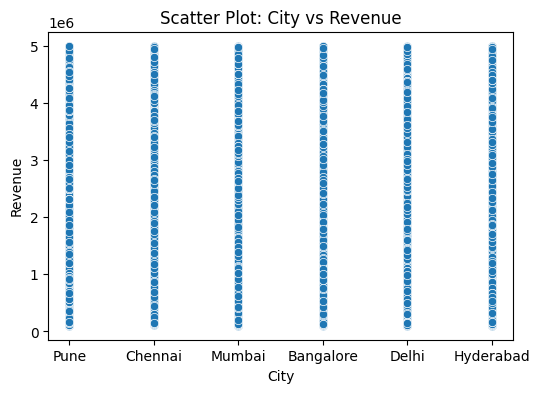

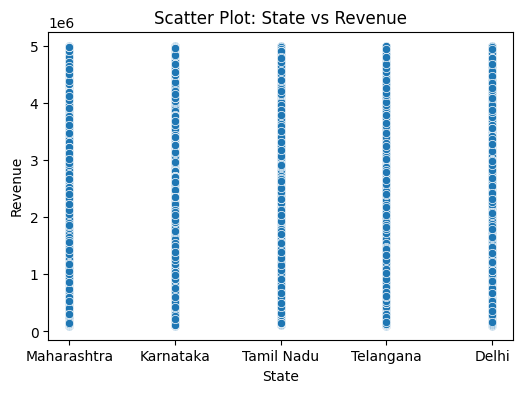

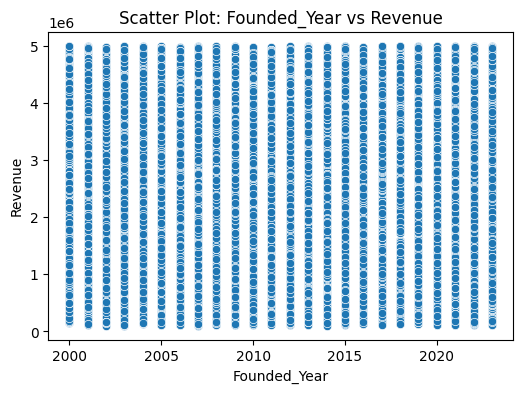

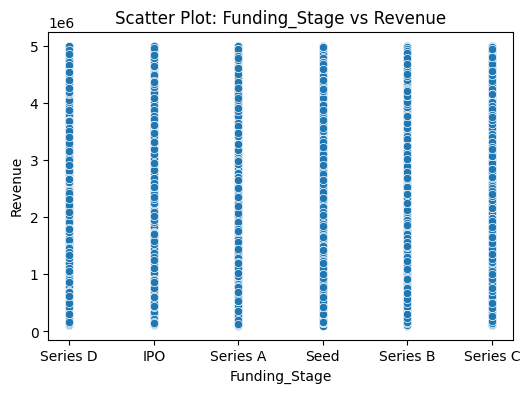

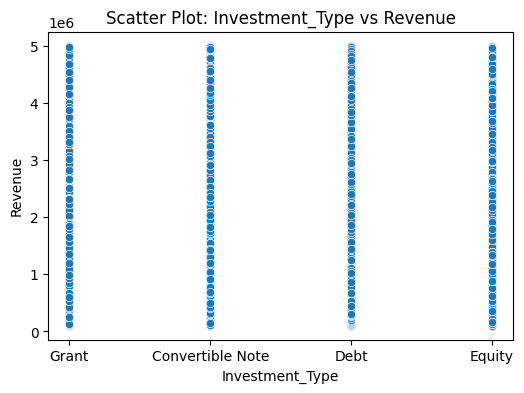

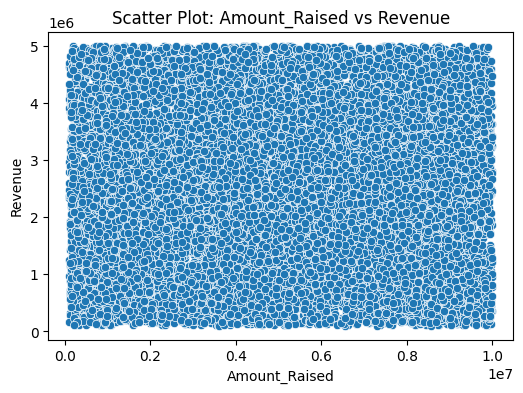

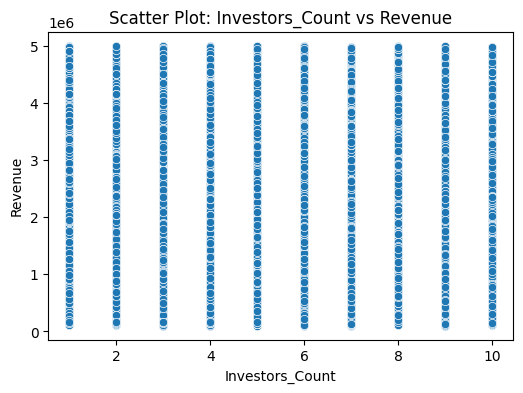

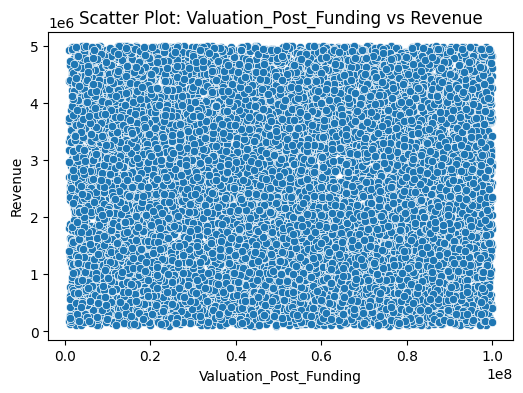

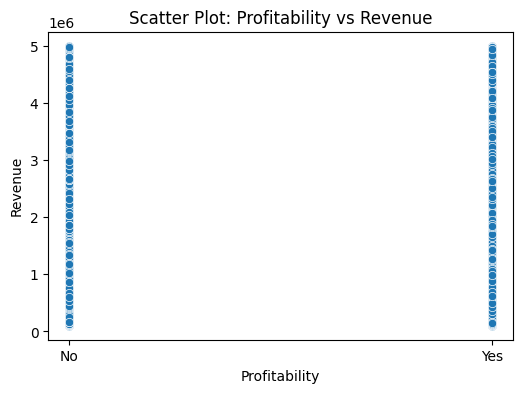

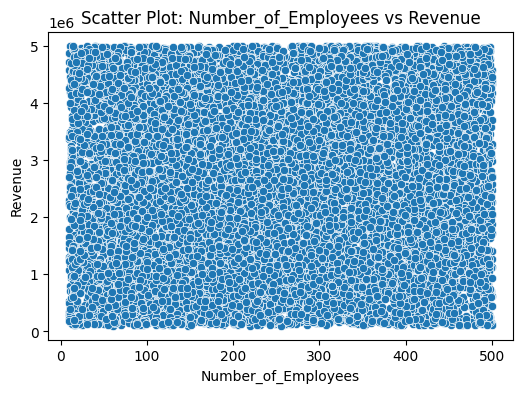

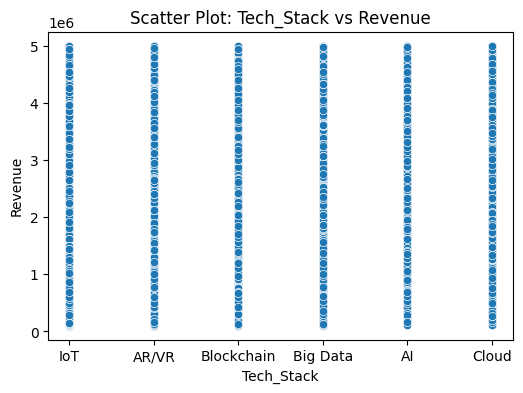

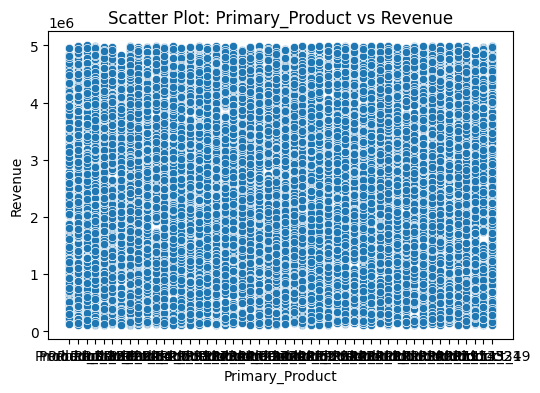

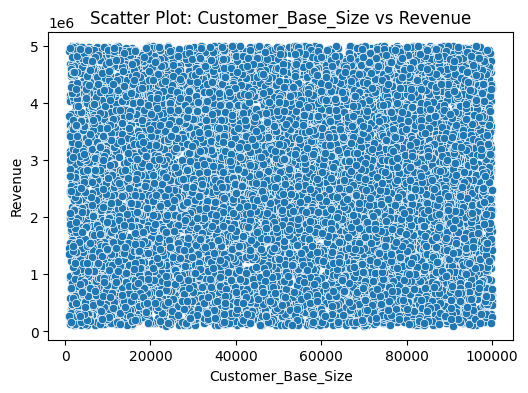

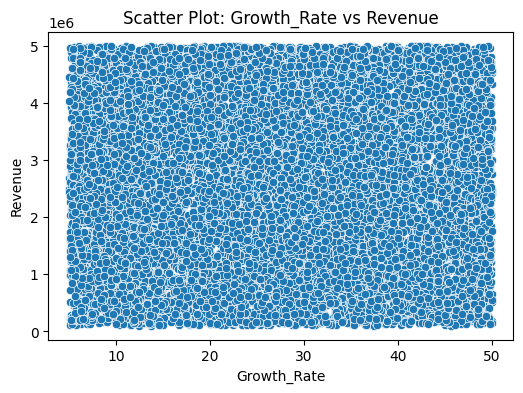

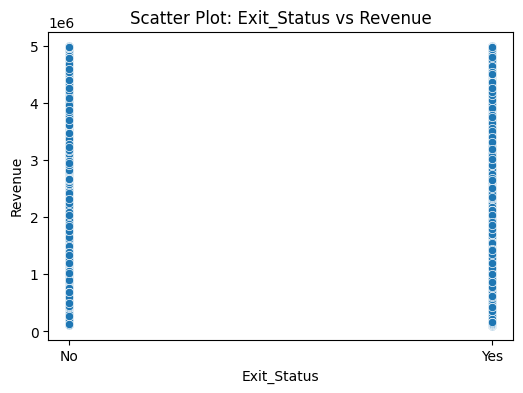

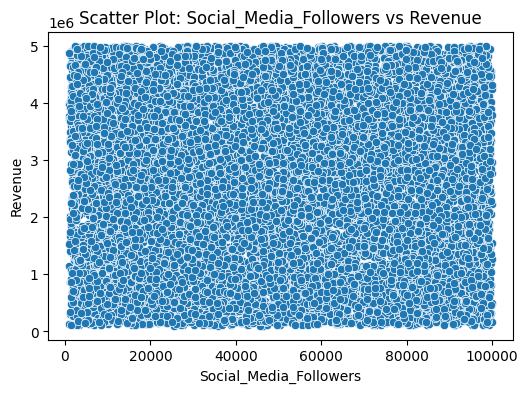

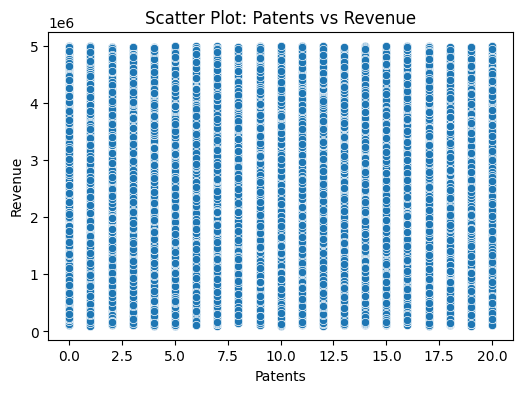

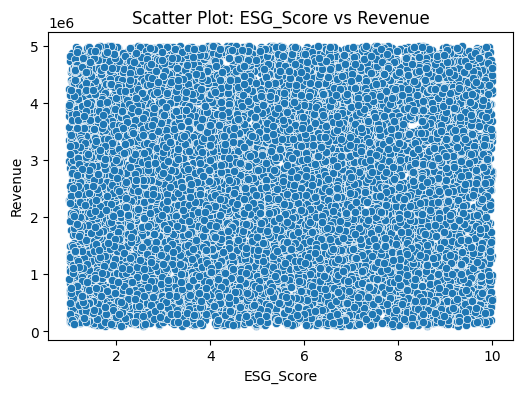

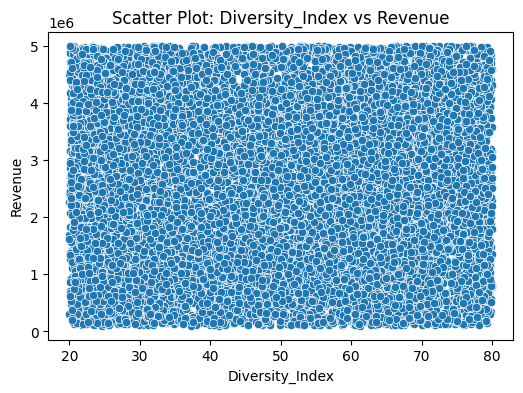

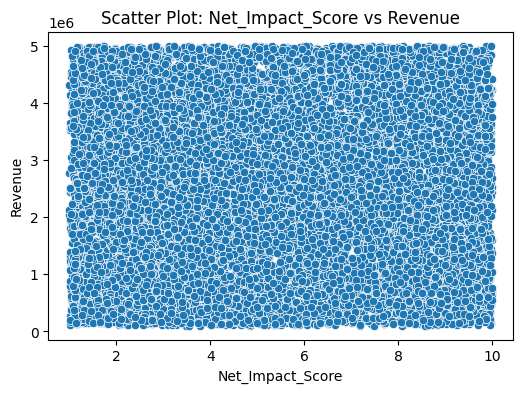

In [16]:
# Scatter Plots (Revenue vs Other Features)
for col in df_cleaned.columns:
    if col != "Revenue":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_cleaned[col], y=df_cleaned["Revenue"])
        plt.xlabel(col)
        plt.ylabel("Revenue")
        plt.title(f"Scatter Plot: {col} vs Revenue")
        plt.show()

In [ ]:
# Normalize numerical features (excluding target "Revenue")
num_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.drop("Revenue")
scaler_X = StandardScaler()
df_cleaned[num_cols] = scaler_X.fit_transform(df_cleaned[num_cols])

In [ ]:
# Apply log transformation to Revenue (reduce variance)
df_cleaned["Revenue"] = np.log1p(df_cleaned["Revenue"])  # log(1 + Revenue)

# Normalize the target variable (Revenue)
scaler_y = StandardScaler()
df_cleaned["Revenue"] = scaler_y.fit_transform(df_cleaned[["Revenue"]])

In [ ]:
# Remove outliers using IQR method
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

df_cleaned = remove_outliers(df_cleaned, num_cols)

In [ ]:
# Save cleaned dataset
df_cleaned.to_csv("Cleaned_Startup_Investment_Data.csv", index=False)

# Define features and target variable
X = df_cleaned.drop(columns=["Revenue"])
y = df_cleaned["Revenue"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define deep learning model with Dropout and more layers
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),  # Prevent overfitting
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile model with reduced learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Lower learning rate for better convergence
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0702 - mae: 0.8161 - val_loss: 1.0018 - val_mae: 0.8036
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9917 - mae: 0.7832 - val_loss: 0.9996 - val_mae: 0.7851
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9860 - mae: 0.7789 - val_loss: 0.9997 - val_mae: 0.7982
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9999 - mae: 0.7896 - val_loss: 0.9983 - val_mae: 0.7919
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0137 - mae: 0.7941 - val_loss: 0.9986 - val_mae: 0.7821
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9857 - mae: 0.7788 - val_loss: 1.0018 - val_mae: 0.7848
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9727 - mae: 0.7762 - val_loss: 1.0024 - val_mae: 0.7921
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9717 - mae: 0.7763 - val_loss: 1.0044 - val_mae: 0.7728
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9836 

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9851 - mae: 0.7830
Test Loss (MSE): 1.0271025896072388, Test MAE: 0.7936909794807434


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,   # Number of decision trees
    max_depth=10,       # Maximum depth of each tree
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

# Fit model on training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Random Forest Model Performance:
Mean Squared Error (MSE): 0.9977
Mean Absolute Error (MAE): 0.7864
